# TDA@HSE 2023

## Homework 1

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from scipy.linalg import block_diag
from sklearn.datasets import make_circles

import simplicial
import simplicial.drawing

from simplicialx.simplicial import SimplicialComplex

### Task 1 (14.02)

Consider the row and column Dowker complexes of a relation from seminar 1. Compute 0- and 1- Betti numbers of both complexes using the boundary matrix reduction algorithm from seminar 2. Conclude.

In [2]:
R = np.array([
    [0, 1, 1, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0],
    [1, 1, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 1, 0, 1, 0, 0],
    [0, 0, 1, 1, 1, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1]
])

actors_rows = [
    "Bale, Christian",
    "Carrey, Jim",
    "Day-Levis, Daniel",
    "Di Caprio, Leonardo",
    "Diaz, Cameron",
    "Freeman, Morgan",
    "Gordon-Levitt, Joseph",
    "Hardy, Tom",
    "Murphy, Cillian",
    "Pitt, Brad",
    "Styles, Harry",
    "Winslet, Kate"
]

films_columns = [
    "Bruce Almighty",
    "Dark Knight",
    "Dark Knight Rises",
    "Dunkirk",
    "Inception",
    "Gangs of New York",
    "Lincoln",
    "Once in Hollywood",
    "Titanic"
]

In [3]:
def row_Dowker_complex(A):
    DowkerComplex = SimplicialComplex()

    for row in A:
        DowkerComplex.add(np.argwhere(row != 0).reshape(-1))

    return DowkerComplex

In [4]:
DC_row = row_Dowker_complex(R)
DC_column = row_Dowker_complex(R.T)

In [5]:
DC_row.simplices

[array([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8]]),
 array([[0, 1],
        [0, 2],
        [1, 2],
        [1, 3],
        [1, 4],
        [2, 3],
        [2, 4],
        [2, 6],
        [3, 4],
        [4, 5],
        [4, 6],
        [5, 6]]),
 array([[0, 1, 2],
        [1, 2, 3],
        [1, 2, 4],
        [1, 3, 4],
        [2, 3, 4],
        [2, 4, 6]]),
 array([[1, 2, 3, 4]])]

In [6]:
DC_column.simplices

[array([[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10],
        [11]]),
 array([[ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 1,  5],
        [ 2,  3],
        [ 2,  4],
        [ 2,  6],
        [ 3,  4],
        [ 3,  6],
        [ 3,  7],
        [ 3,  8],
        [ 5,  6],
        [ 5,  7],
        [ 5,  8],
        [ 6,  7],
        [ 6,  8],
        [ 7,  8],
        [ 7, 10],
        [ 8, 10]]),
 array([[ 0,  5,  6],
        [ 0,  5,  7],
        [ 0,  5,  8],
        [ 0,  6,  7],
        [ 0,  6,  8],
        [ 0,  7,  8],
        [ 2,  3,  4],
        [ 3,  6,  7],
        [ 3,  6,  8],
        [ 3,  7,  8],
        [ 5,  6,  7],
        [ 5,  6,  8],
        [ 5,  7,  8],
        [ 6,  7,  8],
        [ 7,  8, 10]]),
 array([[0, 5, 6, 7],
        [0, 5, 6, 8],
        [0, 5, 7, 8],
        [0, 6, 7, 8],
        [3, 6, 7, 8],
        [5, 6, 7, 8]]),
 a

In [7]:
DC_row.betti(), DC_column.betti()

(array([3., 1., 0., 0.]), array([3., 1., 0., 0., 0.]))

In [8]:
DC_row.f_vector, DC_column.f_vector

(array([ 9, 12,  6,  1]), array([12, 20, 15,  6,  1]))

In [132]:
def boundary_matrix_k(S, k):
    """
    Computes boundary matrix for k and k+1 dim simplices in S
    """
    assert k + 1 < len(S.simplices), 'Incorrect k'

    A = S.simplices
    n_rows, n_columns = len(A[k]), len(A[k + 1])

    B = [[0 for _ in range(n_columns)] for _ in range(n_rows)]

    for i, s1 in enumerate(A[k]):
        for j, s2 in enumerate(A[k + 1]):
            B[i][j] = np.all(np.isin(s1, s2))

    return np.array(B, dtype=np.int16)


def boundary_matrix(S):
    """
    Computes B as the block-diagonal of Bk
    """
    return block_diag(*[boundary_matrix_k(S, k) for k in range(len(S.simplices) - 1)])

In [133]:
def full_boundary_matrix(S):
    """
    Computes boundary matrix given the Simplicial Complex
    (non-block-diagonal case)
    """
    A = S.simplices

    n_rows = sum(len(A[d]) for d in range(len(A) - 1))
    n_columns = sum(len(A[d]) for d in range(1, len(A)))

    B = [[0 for _ in range(n_columns)] for _ in range(n_rows)]

    row_index = 0
    for d1 in range(len(A) - 1):
        column_index = 0

        for d2 in range(d1 + 1, len(A)):
            for i, s1 in enumerate(A[d1]):
                for j, s2 in enumerate(A[d2]):
                    B[row_index + i][column_index + j] = np.all(np.isin(s1, s2))

            column_index += A[d2].shape[0]

        row_index += A[d1].shape[0]

    return np.array(B, dtype=np.int16)

In [134]:
def boundary_matrix_reduction(B):
    # columns_lowest = [0 for _ in range(B.shape[1])]
    # for i in range(B.shape[1]):
    #     nonzero = np.nonzero(B[:, i])
    #     columns_lowest[i] = np.max(nonzero) if len(nonzero) else -1

    columns_lowest = [np.max(nonzero) for i in range(B.shape[1]) if len(nonzero := np.nonzero(B[:, i])[0])]

    for i in range(B.shape[1]):
        j = 0
        while j != i:
            if columns_lowest[j] == columns_lowest[i] and columns_lowest[j] >= 0:
                B[:, i] = (B[:, i] + B[:, j]) % 2
                nonzero = np.nonzero(B[:, i])[0]
                columns_lowest[i] = np.max(nonzero) if nonzero.shape[0] else -1
                j = 0
            else:
                j += 1

    return B

In [135]:
def reduced_boundary_matrix(A):
    return boundary_matrix_reduction(boundary_matrix(A))

In [136]:
BM_row = boundary_matrix(DC_row)
BMR_row = boundary_matrix_reduction(BM_row)

In [141]:
def compute_betti(S, k):
    """
    Computes betti_k for given Simplicial Complex
    via boundary matrix reduction algorithm
    """
    assert k + 1 < len(S.simplices), 'Incorrect k'

    A = S.simplices
    BMR = reduced_boundary_matrix(S)

    c1 = sum(A[i].shape[0] for i in range(k)) - A[0].shape[0]
    c2 = c1 + A[k].shape[0]
    c3 = c2 + A[k + 1].shape[0]

    # we don't have empty vertex columns in boundary matrix
    first_nonzero_columns = sum(np.any(BMR[:, i]) for i in range(c1, c2)) if k > 0 else 0
    first_zero_columns = A[k].shape[0] - first_nonzero_columns
    second_nonzero_columns = sum(np.any(BMR[:, i]) for i in range(c2, c3))

    return first_zero_columns - second_nonzero_columns

In [142]:
betti_0 = compute_betti(DC_row, 0)
betti_1 = compute_betti(DC_row, 1)
betti_0, betti_1

(3, 1)

In [143]:
betti_0 = compute_betti(DC_column, 0)
betti_1 = compute_betti(DC_column, 1)
betti_0, betti_1

(3, 1)

### Task 2 (1.03)

Consider the standard algorithm for computing persistent homology of a filtered simplicial complex $K$ from seminar 2. Given a boundary matrix of a filtration $\mathbf{B}$, the task is to obtain a reduced matrix $\mathbf{R}$. Out of reduced matrix one can obtain the persistent pairing $P$, i.e. the birth-death simplex pairs for each homological class given by the column-row indices of the non-zero columns of $\mathbf{B}$, and the persistent diagram $D$ given by the correspoding filtration function value for the pairing (seminar 3).

Consider the $2$-skeleton of the Vietoris-Rips filtration of a set $X \in \mathbb{R}^2$ sampled from a circle.

In [3]:
X, _ = make_circles(n_samples=(30, 0), noise=0.15, random_state=42)

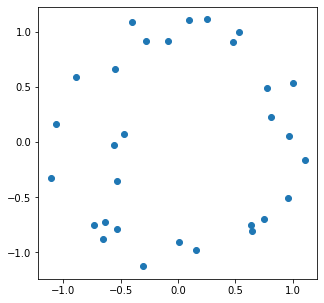

In [4]:
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1])
plt.show()

The $2$-skeleton of a filtered Vietoris-Rips complex have $X$ as the vertex set of cardinality $n$, with simplices up to dimension $2$, given by all possible $k$ out of $n$ combinations of vertices.

Simplices (thus columns of the boundary matrix $\mathbf{B}$) in the Vietoris-Rips filtration are ordered by the following rule:

- filtration function value, with $f(\sigma)=0$ for vertices, $f(\sigma)=d(x_i, x_j)$ for edges, and $f(\sigma) = \max_{(x_i, x_j) \in \sigma} d(x_i, x_j)$ for all other simplices,
- simplex dimension,
- lexicographic order given by any ordering of the vertices (the ordering is given by the order of rows in the matrix $\mathbf{X}$).

#### Task

Given a set of vertices $X$ compute the boundary matrix of its Vietoris-Rips filtration $\mathbf{B}$, the reduced matrix $\mathbf{R}$, persistent pairing $P_{VR}(X)$, persistent diagram $D_{VR}(X)$ and the representative cycles for each homological class of dimension $1$.

Plot the persistence diagram as a scatter plot or a barcode. Plot the representative cycles on the original plot of the set $X$.

Permute the rows of the matrix $\mathbf{X}$ to obtain new order on simplices given by the new order on vertices. Run the algorithm on the permutation $\pi(\mathbf{X})$. Plot the results, and conclude whether a persistent pairing, a persistent diagram, and representative cycles depend on the order on vertices.

In [ ]:
# your code here